# **Importing Necessary Files**
Importing libraries are very much necessary for the classification task. Here we have imported pandas as we will process our data as pandas dataframe. Seaborn library is imported for visualization purposes. different forms of sklearn library has been imported to deploy machine learning algorithm on our data. Os library is imported to manipulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os
import re #Regular expression
from sklearn.model_selection import KFold,cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc

# **Attaching Kaggle to our Colab File**

In [ ]:
import kagglehub

# Download latest version of kaggle dataset
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1


# **Looking onto File Directory**

In [ ]:
path='/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1'
directories=os.listdir(path)
print(directories)

['News _dataset']


In [ ]:
data_path=path+'/'+directories[0]
print(os.listdir(data_path))

['Fake.csv', 'True.csv']


# **Data Preprocessing Steps**

In [ ]:
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

true = pd.read_csv(data_path+"/"+"True.csv") #Reading files with true labels
false = pd.read_csv(data_path+"/Fake.csv") #Reading files with false labels

/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset/Fake.csv
/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset/True.csv


# **Look onto the data**

In [ ]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
false.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# **Adding Label Columns**
The purpose of this section is to add label column in the dataframe and make them concatenate to make a unified dataframe

In [ ]:
true['Label']=1 #adding label columns for truth
false['Label']=0 #adding label columns for false

**Checking into if the column addition has been successful**

In [ ]:
true.head(10)

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


# **News Source Visualization**

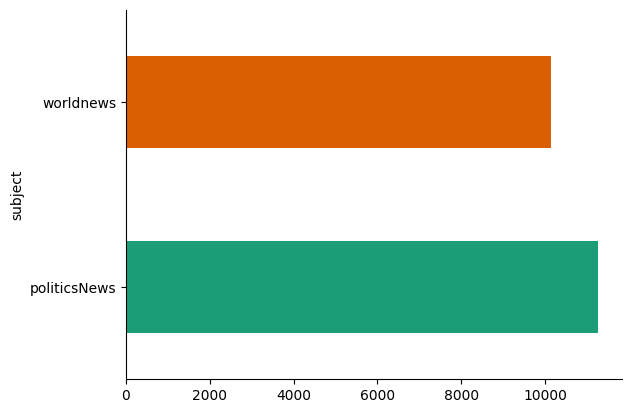

In [ ]:
# @title subject
true.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

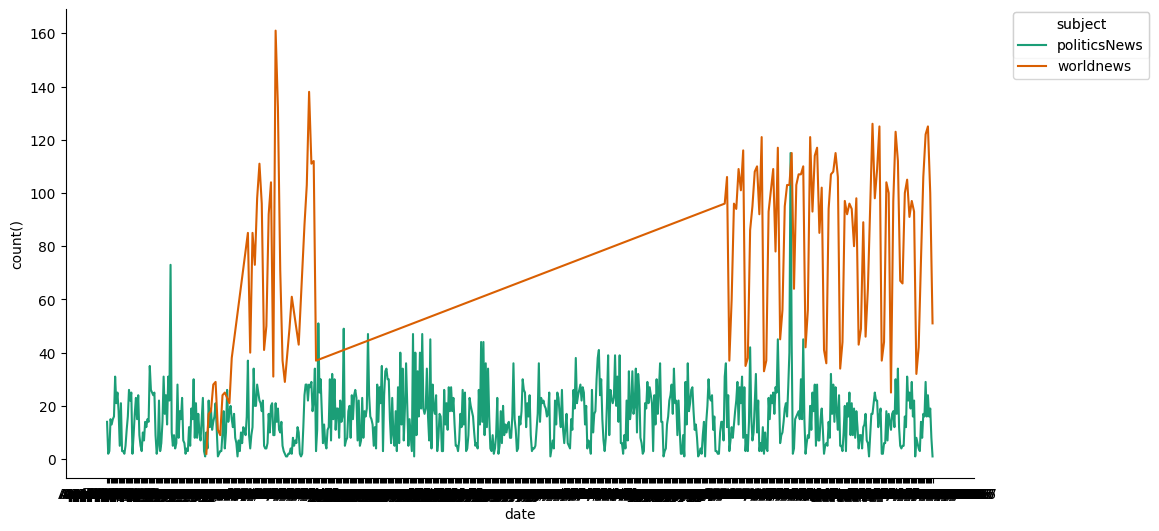

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)]) #Plotting time series data

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = true.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('subject')):
  _plot_series(series, series_name, i)
  fig.legend(title='subject', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

In [ ]:
false.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# **News Distribution**

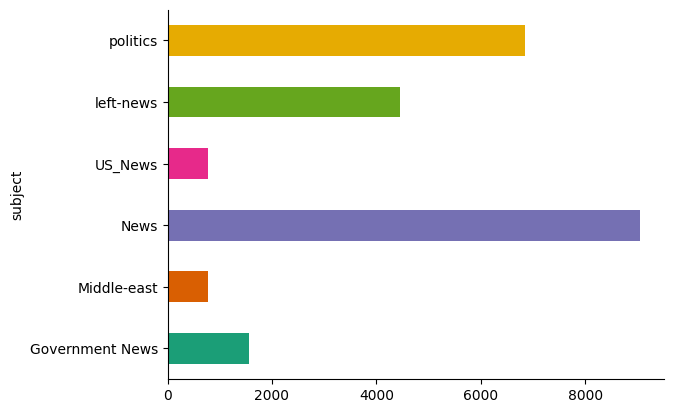

In [ ]:

false.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Unified Dataset Creation**
Here we will concatenate true and false two datasets to create a unified dataset and then resample it so that dataset gets uniformly distributed

In [ ]:
unidataset=pd.concat([true,false],axis=0)
unidataset=unidataset.sample(frac=1)

**Looking onto distribution**

In [ ]:
unidataset.head(10)

,title,text,subject,date,Label
13259,BILL CLINTON STEPS IN IT: Accuses FBI Of Servi...,Oh boy! This is getting good! Bill Clinton is ...,politics,"Aug 13, 2016",0
395,A Florida Pizza Hut To Irma-Fleeing Employees...,Residents in Florida who work at a Pizza Hut w...,News,"September 11, 2017",0
7042,Mississippi Republicans Get Their Asses Hande...,When Mississippi Republicans passed a discrimi...,News,"April 7, 2016",0
22231,"Uber, Google, Twitter, Netflix and Other Tech ...",21st Century Wire says A group of top Silicon ...,US_News,"February 6, 2017",0
3378,Trump decides against Russia 'war room' in the...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 6, 2017",1
11258,Majority of Americans support next president p...,WASHINGTON (Reuters) - Half of all Americans s...,politicsNews,"January 13, 2016",1
22778,MSM Fake News: How Washington Post Sexed-up it...,This is a story about how once trusted mainstr...,Middle-east,"September 26, 2017",0
8924,All Talk NRA Refuses Chance To Debate Obama O...,Apparently the only thing the National Rifle A...,News,"January 6, 2016",0
2467,Putin: We'll have to retaliate against 'illega...,"SAVONLINNA, Finland (Reuters) - President Vlad...",politicsNews,"July 27, 2017",1
13478,FLASHBACK: Watch Hillary Accuse Obama Of Plagi...,How soon they forget Obama was called out duri...,politics,"Jul 20, 2016",0


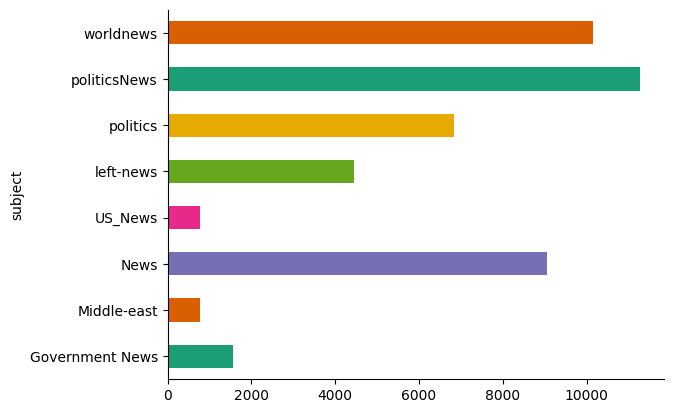

In [ ]:
#Data source and Number of instance distribution
from matplotlib import pyplot as plt
import seaborn as sns
unidataset.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
unidataset.reset_index(inplace=True)

In [ ]:
unidataset.head()

,index,title,text,subject,date,Label
0,13259,BILL CLINTON STEPS IN IT: Accuses FBI Of Servi...,Oh boy! This is getting good! Bill Clinton is ...,politics,"Aug 13, 2016",0
1,395,A Florida Pizza Hut To Irma-Fleeing Employees...,Residents in Florida who work at a Pizza Hut w...,News,"September 11, 2017",0
2,7042,Mississippi Republicans Get Their Asses Hande...,When Mississippi Republicans passed a discrimi...,News,"April 7, 2016",0
3,22231,"Uber, Google, Twitter, Netflix and Other Tech ...",21st Century Wire says A group of top Silicon ...,US_News,"February 6, 2017",0
4,3378,Trump decides against Russia 'war room' in the...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 6, 2017",1


# **Data Cleaning Operation**

**Check Null and Remove It**

In [ ]:
unidataset.isnull().sum()

,0
index,0
title,0
text,0
subject,0
date,0
Label,0


**So there is no null instance in the dataset**

**Removing Unnecessary column**

But as we want to use that data for future purposes, we will make a copy

In [ ]:
dataset=unidataset.copy() #making a copy of original dataset
dataset=dataset.drop(['title','subject','date','index'],axis=1)

**Now looking inside data**

In [ ]:
dataset.head(10)

,text,Label
0,Oh boy! This is getting good! Bill Clinton is ...,0
1,Residents in Florida who work at a Pizza Hut w...,0
2,When Mississippi Republicans passed a discrimi...,0
3,21st Century Wire says A group of top Silicon ...,0
4,WASHINGTON (Reuters) - U.S. President Donald T...,1
5,WASHINGTON (Reuters) - Half of all Americans s...,1
6,This is a story about how once trusted mainstr...,0
7,Apparently the only thing the National Rifle A...,0
8,"SAVONLINNA, Finland (Reuters) - President Vlad...",1
9,How soon they forget Obama was called out duri...,0


In [ ]:
dataset.tail(10)

,text,Label
44888,Wow! Talk about clueless! Austen Fletcher appr...,0
44889,Remember when people paid attention to Arnold ...,0
44890,SAN FRANCISCO/WASHINGTON (Reuters) - President...,1
44891,That s what we re talking about! Another campa...,0
44892,"AL RAWDAH, Egypt (Reuters) - People wounded in...",1
44893,Smashing windows How progressive!Protests aga...,0
44894,The fallout from what s turning out to be a th...,0
44895,WASHINGTON (Reuters) - U.S. Representative Rub...,1
44896,(Reuters) - President Donald Trump’s pick to l...,1
44897,While the Trump administration is up to its co...,0


# Observing Different columns differently

In [ ]:
dataset['text'].head(5)

,text
0,Oh boy! This is getting good! Bill Clinton is ...
1,Residents in Florida who work at a Pizza Hut w...
2,When Mississippi Republicans passed a discrimi...
3,21st Century Wire says A group of top Silicon ...
4,WASHINGTON (Reuters) - U.S. President Donald T...


In [ ]:
dataset['Label'].head(5)

,Label
0,0
1,0
2,0
3,0
4,1


# **Data Preprocessing Steps**

**Let's observe a dataset text instance:**

Father Gerald Murphy goes off on Hillary Clinton following her speech at the Al Smith elite charity dinner last night in New York, where Hillary used a quote of the Pope s as a way to fake his endorsement of her. Given what her staff said about Catholic faith about an attempt to subvert it, there should have been a statement right at the start saying, I disown everything that was written in those emails. Donald Trump has said quite clearly he s pro-life, Catholics are quite heartened by that. I wish Hillary Clinton would change her position. But at least don t try and pretend that the Pope is endorsing her by quoting him selectively. Thank you, Father! Father Gerald Murray goes off on @HillaryClinton who refused to apologize to Catholics & supports partial birth abortion! pic.twitter.com/cLvJxlwo6p Boston Bobblehead (@DBloom451) October 21, 2016


**Here we can see that in the text there are links "/com/etc... b format, date,
mentioning of different twitter handles like '@HillaryClinton", commas, exclamation marks etc which makes data preprocessing very necessary**



**Our Data preprocessing will in multiple forms. They are given below first we will remove all the website address including html tags, special characters like #@ etc, numbers, newlines etc but first of all we will lower all the characters**

In [ ]:
def preprocess_text(corpus):
  #Lowering the text corpus
  corpus = corpus.lower()
  #Removing websites from corpus
  corpus = re.sub('https?://\S+|www\.\S+', '', corpus)
  #Removing Special Characters from corpus
  corpus = re.sub('[^\w\s]','',corpus)
  #Removing Digits from the text corpus
  corpus=re.sub(r'\d+','',corpus)
  #Removing Newlines from the text corpus
  corpus=re.sub(r'\n','',corpus)
  return corpus

**Now we will apply the function on the whole dataset and view change**

In [ ]:
dataset['text']=dataset['text'].apply(preprocess_text)

In [ ]:
#Viewing change
dataset['text'].head(5)

,text
0,oh boy this is getting good bill clinton is no...
1,residents in florida who work at a pizza hut w...
2,when mississippi republicans passed a discrimi...
3,st century wire says a group of top silicon va...
4,washington reuters us president donald trump ...


# **Saving Dataset For Future Use**

In [ ]:
dataset.to_csv('preprocessed_dataset.csv',index=False)#saving dataset for future use

# **Preparation Dataset For Training and Testing**

**Here we will assign X,Y with Text and Label of the dataset column sequentially**

In [ ]:
X=dataset['text']
Y=dataset['Label']

**Creating train and test set**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.112,random_state=42) #Here we want to keep approximately 5000 examples in test set

In [ ]:
print("Training Set Size: ",x_train.shape)
print("Test Set Size: ",x_test.shape) #some extra 29 values remained in the dataset

Training Set Size:  (39869,)
Test Set Size:  (5029,)


In [ ]:
print(x_train[12])

gosh i wonder why the clinton foundation has come under fire in the past for foreign donationsa previous donor the kingdom of saudi arabia has given between  million and  million since the foundation was created in this is all a question of ethics both for the donations to possibly curry favor with clinton and the omission of lots and lots of money the clinton foundation failed to report  million in donations from governments to the internal revenue service newly refiled tax returns showreuters reported that the foundation disclosed the  million it received from governments most of them foreign between  and  when it and a spinoff organization refiled tax returns from six years to fix errorsthe bill hillary  chelsea clinton foundation did not previously separate out its donations from governments on old tax returns as is mandated by the irsthe foundation refiled tax returns from    and  and a charity spun off from the foundation the clinton health access initiative refiled its own retur

# **Vectorization of Texts**
As ml models cannot work on texts we will vectorize the words using TFidVectorizer which will make the dataset in matrix format

In [ ]:
vectorizer=TfidfVectorizer() #we are initializing TFidVectorizer
x_train_vector=vectorizer.fit_transform(x_train)
x_test_vector=vectorizer.transform(x_test)

**Now we will look into vectorization results**

In [ ]:
print(x_train_vector.shape)
print(x_test_vector.shape)
print(y_train.shape)
print(y_test.shape)

(39869, 197632)
(5029, 197632)
(39869,)
(5029,)


**Observing Vector Results**

In [ ]:
val=12
print(x_train_vector[val])

  (0, 173143)	0.31930233123030827
  (0, 117984)	0.14305230932839338
  (0, 191746)	0.025271402279735122
  (0, 189997)	0.0177971016550804
  (0, 76009)	0.015779659052490926
  (0, 60505)	0.023813014794235737
  (0, 176555)	0.17430389390809606
  (0, 80636)	0.10009250423208414
  (0, 23998)	0.02763213902516457
  (0, 7524)	0.044390567948944505
  (0, 119166)	0.03525737827379197
  (0, 120258)	0.018919599988740935
  (0, 11009)	0.01389952766577655
  (0, 73071)	0.014669198786909844
  (0, 172899)	0.03572399891056347
  (0, 7367)	0.014900400357414433
  (0, 119126)	0.011285470964326147
  (0, 72558)	0.02870716219951766
  (0, 115822)	0.043509020364104124
  (0, 161595)	0.021533357694950756
  (0, 135582)	0.017382495310160014
  (0, 173264)	0.018188506410316968
  (0, 122209)	0.029610362485687124
  (0, 175646)	0.022962239891453615
  (0, 154923)	0.036580025225488776
  :	:
  (0, 83732)	0.0519154379751169
  (0, 61829)	0.03476405702456731
  (0, 25193)	0.0589814733523059
  (0, 120040)	0.05286912902451466
  (0, 9502

# **Creating K-Fold Cross Validation**
**Here we will be using 5-fold Cross Validation for our task. We can use different cross validation but 5 fold is our primary target**

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

# **Training Machine Learning Models with Dataset**
Here we will create lists which will preserve our models, accuracy, precision etc.
Here for the assignment our focus will be primarily on Naive Bayes and Logistic Regression but we will implement Random Forest Classifier also

accuracy: [0.98858791 0.98708302 0.98745924 0.98971658 0.9892136 ]
Mean accuracy: 0.9884120695659867

precision: [0.9878741  0.98719624 0.98246546 0.98733509 0.98606452]
Mean precision: 0.986187081004056

recall: [0.9886393  0.98590814 0.9908896  0.99099576 0.99169478]
Mean recall: 0.9896255178183748

f1: [0.98825655 0.98655177 0.98665955 0.98916204 0.98887164]
Mean f1: 0.9879003092945522

roc_auc: [0.9987121  0.99866704 0.99838925 0.99926774 0.99901741]
Mean roc_auc: 0.9988107067657312

Logistic Regression


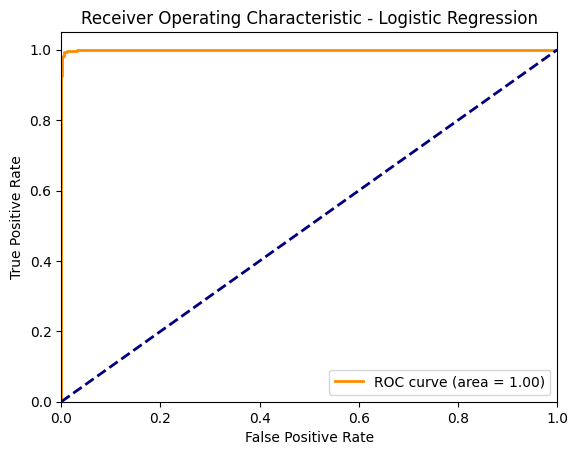

accuracy: [0.94645097 0.947078   0.94645097 0.94895912 0.94519002]
Mean accuracy: 0.9468258136447532

precision: [0.94544984 0.94193883 0.93567097 0.94108405 0.93794872]
Mean precision: 0.9404184835000269

recall: [0.94422928 0.94832985 0.95096463 0.95180085 0.94939009]
Mean recall: 0.9489429393641325

f1: [0.94483917 0.94512354 0.94325581 0.94641211 0.94363472]
Mean f1: 0.9446530708712435

roc_auc: [0.98631438 0.98540632 0.98427201 0.98705166 0.9848557 ]
Mean roc_auc: 0.9855800169388044

Naive Bayes


<Figure size 640x480 with 0 Axes>

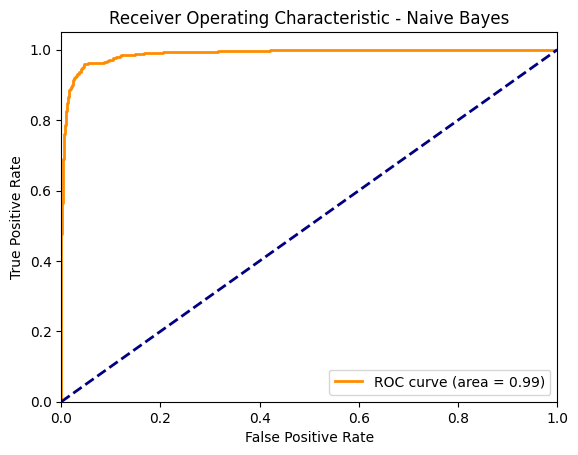

<Figure size 640x480 with 0 Axes>

In [ ]:
model_list=[]
accuracy_list=[]
precision_list=[]
recall_list=[]
f1_list=[]
y_pred_list = []
models = []
#models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', MultinomialNB()))
#Defining Scoring Metrices which will be used to evaluate.
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i,model in models:
     #model.fit(x_train_vector,y_train) #This line for training model without k-fold cross validation
     scores=cross_validate(model,x_train_vector,y_train,cv=kf,scoring=['accuracy','precision','recall','f1','roc_auc'])
     for metric in scoring_metrics:
        print(f"{metric}: {scores[f'test_{metric}']}")
        print(f"Mean {metric}: {scores[f'test_{metric}'].mean()}")
        print()
     scores_df = pd.DataFrame(scores)
     scores_df.to_csv(f'{i}_scores.csv', index=False) #Saving the validation Scores
     #Fitting the model after cross validation
     #Otherwise we will not be evaluate it on the test set
     model.fit(x_train_vector,y_train)
     pred = model.predict(x_test_vector)
     print(i)
     model_list.append(i)
     accuracy_list.append(accuracy_score(y_test, pred)) #Storing accuracy
     precision_list.append(precision_score(y_test, pred)) #Storing precision
     recall_list.append(recall_score(y_test, pred)) #Storing Recall
     f1_list.append(f1_score(y_test, pred)) #Storing F-1
     y_pred_list.append(pred) #Storing predictions


     #ROC Curve Generation section we need true and false positive
     y_prob = model.predict_proba(x_test_vector)[:, 1]  # Probability of positive class
     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
     roc_auc = auc(fpr, tpr)


     #Plotting the curve and saving it for each model
     plt.figure()
     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title(f'Receiver Operating Characteristic - {i}')
     plt.legend(loc="lower right")
     plt.show()
     plt.savefig(f'{i}_roc_curve.png') #Saving the Figure

In [ ]:
summary_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'y_pred':y_pred_list
})

# **Visualization of Confusion Matrix**

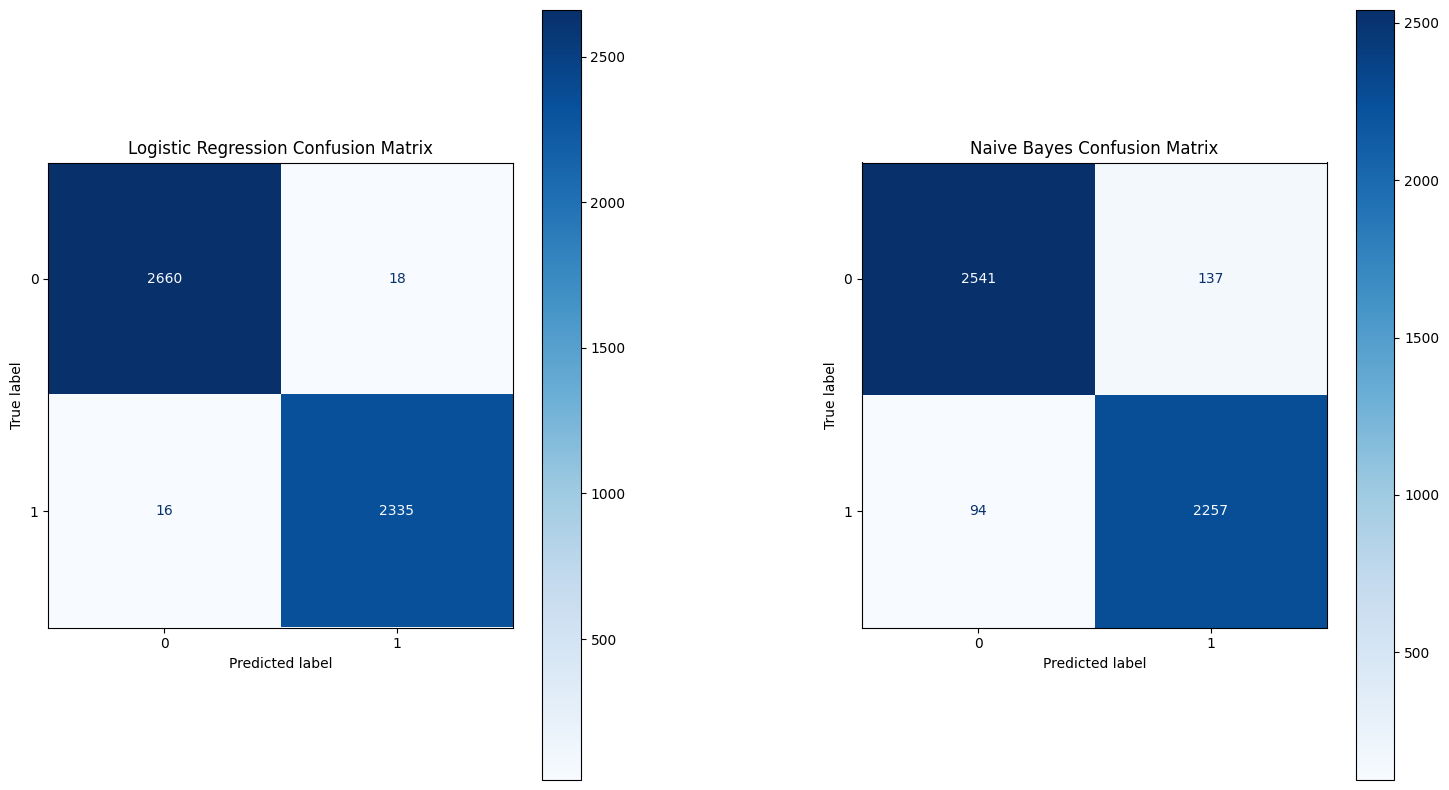

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Number of models
num_models = len(model_list)

# Adjust the number of subplots based on the number of models
fig, axes = plt.subplots(1, num_models, figsize=(18, 10))  # Create subplots based on number of models
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# If there's only one model, `axes` will not be an array, so we handle that case
if num_models == 1:
    axes = [axes]  # Make it a list so we can iterate over it

# Plot confusion matrix for each model
for i, (ax, model_name) in enumerate(zip(axes, model_list)):
    cm = confusion_matrix(y_test, y_pred_list[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    ax.set_title(f'{model_name} Confusion Matrix')

plt.show()

# **Visualizing Precision, Accuracy, Recall and F-1 Score**

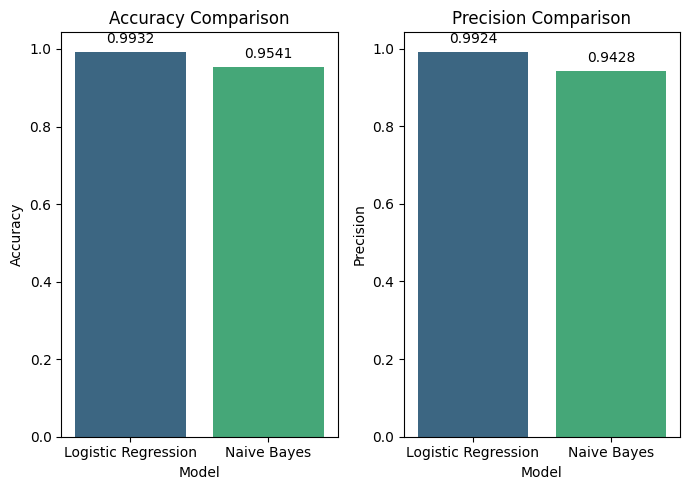

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

axes = axes.flatten()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
i=0
for ax, metric in zip(axes, metrics):
    sns.barplot(x='Model', y=metric, data=summary_df, ax=ax, palette="viridis",hue='Model',legend=False)
    ax.set_title(f'{metric} Comparison')
    #ax.set_ylim(0.72, 0.79)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

# **Ensemble Modeling**

**In ensemble modeling we will demonstrate different approaches likes Majority Voting and Stacking but here we will not be using cross validation**

In [ ]:
#Importing Voting and Stacking Classifiers for our task.
#We will study the implementation of both
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

**Adding Multiple Models**

In [ ]:
# Define base models
#Here apart from our previous Logistic Regression and Naive Bayes we have also added Random Forest as an Extra
#classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('nb', MultinomialNB())
]


**Initializing Voting Classifier**

In [ ]:
# Define voting classifier
model = VotingClassifier(estimators=estimators, voting='soft')#Here we used soft voting for our task

**Fitting the classifier**

In [ ]:
model.fit(x_train_vector, y_train)
y_pred = model.predict(x_test_vector)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.9844899582421953


**We have seen from the section that Maximum voting classifier produces Test Accuracy of 98.45% which is greater than simple Naive Bayes**

ROC_AUC Score:  0.9991030810980966


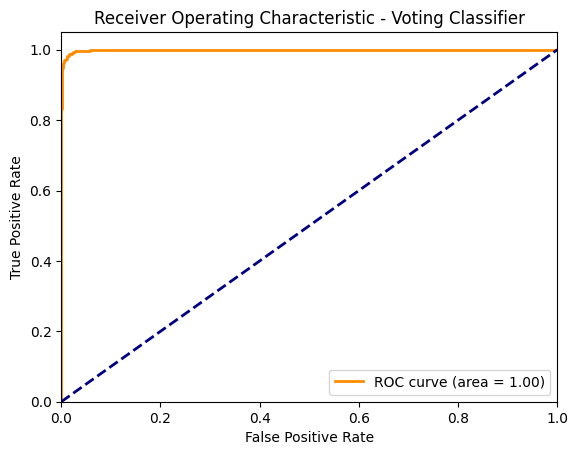

<Figure size 640x480 with 0 Axes>

In [ ]:

# ROC Curve Generation for Voting Classifier
y_prob = model.predict_proba(x_test_vector)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score: ",roc_auc)
# Plotting the curve and saving it
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Voting Classifier')
plt.legend(loc="lower right")
plt.show()
plt.savefig('VotingClassifier_roc_curve.png')

# **Here ROC Curve are of 1.00 is better than Naive Bayes with 98.3%**

# **Next we want to use hard voting with same classifier and will observe the effects**

In [ ]:
model1 = VotingClassifier(estimators=estimators, voting='hard')# Here I am using hard voting

**Fitting the ensemble classifier**

In [ ]:
model1.fit(x_train_vector, y_train)
y_pred = model.predict(x_test_vector)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.9844899582421953


**Hard Voting Produces same amount of result**

# **Cross Validation and Voting Classifier**
**There are two types of classifiers K-Fold and Stratified K-Fold Cross Validation Classifiers. Previously our focus lied on normal K-Fold Classification classifier**

**Here we will try to use Stratified K-fold cross validation Classifier**

In [ ]:
from sklearn.model_selection import StratifiedKFold
stat_kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
voting_clf=VotingClassifier(estimators=estimators,voting='soft')

# **MetricsAgain Same**

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [ ]:
scores=cross_validate(voting_clf,x_train_vector,y_train,cv=stat_kfold,scoring=['accuracy','precision','recall','f1','roc_auc'])

In [ ]:
print(scores['test_accuracy'])
print(scores['test_precision'])
print(scores['test_recall'])
print(scores['test_f1'])
print(scores['test_roc_auc'])

[0.98482568 0.98319539 0.98332079 0.98470028 0.98344412]
[0.98348191 0.97989031 0.9829217  0.9814573  0.97964509]
[0.98477291 0.98503544 0.98214755 0.98661066 0.98581933]
[0.98412698 0.98245614 0.98253447 0.98402723 0.98272251]
[0.99896788 0.99851026 0.99840461 0.99901062 0.99821057]


In [ ]:
#Mean Test Accuracy
print(scores['test_accuracy'].mean())
print(scores['test_precision'].mean())
print(scores['test_recall'].mean())
print(scores['test_f1'].mean())
print(scores['test_roc_auc'].mean())

0.9838972521726591
0.9814792631239877
0.9848771761264233
0.9831734682529143
0.9986207878416009


In [ ]:
scores_df = pd.DataFrame(scores)
scores_df.to_csv(f'VotingClassifier_scores.csv', index=False) #We will be using same voting classfier

# Comparison with Normal K-fold

In [ ]:
cv_result=pd.read_csv('Logistic Regression_scores.csv')

In [ ]:
cv_result

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,1.669219,0.081009,0.988588,0.987874,0.988639,0.988257,0.998712
1,5.324409,0.078996,0.987083,0.987196,0.985908,0.986552,0.998667
2,5.032378,0.062845,0.987459,0.982465,0.990890,0.986660,0.998389
3,3.732535,0.043781,0.989717,0.987335,0.990996,0.989162,0.999268
4,2.069091,0.061822,0.989214,0.986065,0.991695,0.988872,0.999017


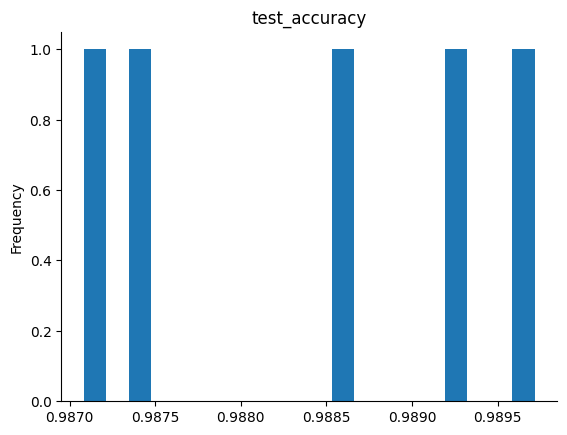

In [ ]:
# @title test_accuracy

from matplotlib import pyplot as plt
cv_result['test_accuracy'].plot(kind='hist', bins=20, title='test_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

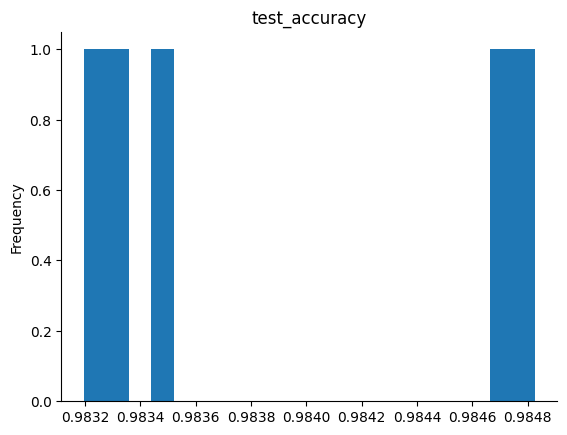

In [ ]:
scores_df['test_accuracy'].plot(kind='hist', bins=20, title='test_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)